<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Artificial_Intelligence/blob/main/Preprocessing_Gold_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

In [87]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gold Price Prediction Dataset (1).csv')

In [88]:
df.shape

(1718, 19)

In [89]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,A,105.09,104.88,106.50,104.88,14330,A
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,A,103.35,103.51,104.56,102.46,140080,B
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,B,103.64,103.63,104.57,102.37,147880,A
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,A,106.73,104.30,107.27,103.91,170240,A
4,21-12-11,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,NaN,NaN,122.750000,124.169998,107.838242,B,107.71,107.15,108.17,106.16,145090,A


In [90]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,21
SP_high,21
SP_low,0


In [91]:
# 1. Remove Null Values
df = df.dropna()
df = df.reset_index(drop=True)

In [92]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,0
SP_high,0
SP_low,0


In [93]:
df.duplicated().sum()

0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1697 non-null   object 
 1   Open        1697 non-null   float64
 2   High        1697 non-null   float64
 3   Low         1697 non-null   float64
 4   Close       1697 non-null   float64
 5   Adj Close   1697 non-null   float64
 6   Volume      1697 non-null   int64  
 7   SP_open     1697 non-null   float64
 8   SP_high     1697 non-null   float64
 9   SP_low      1697 non-null   float64
 10  SP_close    1697 non-null   float64
 11  SP_Ajclose  1697 non-null   float64
 12  EU_Trend    1697 non-null   object 
 13  OF_Price    1697 non-null   float64
 14  OF_Open     1697 non-null   float64
 15  OF_High     1697 non-null   float64
 16  OF_Low      1697 non-null   float64
 17  OF_Volume   1697 non-null   int64  
 18  OF_Trend    1697 non-null   object 
dtypes: float64(14), int64(2), o

In [95]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,126.951426,127.477619,126.408874,126.945480,126.945480,8.425534e+06,205.437731,206.324425,204.429858,205.436871,193.206631,77.095763,77.113477,77.973259,76.187213,226868.945197
std,17.307220,17.406226,17.178650,17.312775,17.312775,4.932720e+06,43.260251,43.399326,43.050455,43.207556,47.963793,27.319685,27.285059,27.308310,27.243194,88846.081603
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,27.880000,27.990000,28.750000,27.100000,11520.000000
25%,116.129997,116.510002,115.650002,116.029999,116.029999,5.386700e+06,174.910004,175.839996,174.110001,175.149994,157.769180,52.030000,52.060000,52.750000,51.320000,177350.000000
50%,121.730003,122.199997,121.190002,121.650002,121.650002,7.438600e+06,205.880005,206.929993,204.800003,205.759995,192.246399,69.310000,69.300000,69.970000,68.580000,224200.000000
75%,128.089996,128.669998,127.570000,128.039993,128.039993,1.017010e+07,237.559998,238.119995,236.759995,237.690002,229.168243,107.470000,107.450000,108.260000,106.790000,282720.000000
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,290.560242,126.220000,126.160000,128.400000,125.000000,567760.000000


In [96]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'EU_Trend',
       'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'],
      dtype='object')

In [97]:
binary_cols = ['Date','OF_Trend','EU_Trend']

In [98]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [99]:
for i in binary_cols:
  df[i] = encoder.fit_transform(df[i])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1697 non-null   int64  
 1   Open        1697 non-null   float64
 2   High        1697 non-null   float64
 3   Low         1697 non-null   float64
 4   Close       1697 non-null   float64
 5   Adj Close   1697 non-null   float64
 6   Volume      1697 non-null   int64  
 7   SP_open     1697 non-null   float64
 8   SP_high     1697 non-null   float64
 9   SP_low      1697 non-null   float64
 10  SP_close    1697 non-null   float64
 11  SP_Ajclose  1697 non-null   float64
 12  EU_Trend    1697 non-null   int64  
 13  OF_Price    1697 non-null   float64
 14  OF_Open     1697 non-null   float64
 15  OF_High     1697 non-null   float64
 16  OF_Low      1697 non-null   float64
 17  OF_Volume   1697 non-null   int64  
 18  OF_Trend    1697 non-null   int64  
dtypes: float64(14), int64(5)
me

In [101]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,842,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,0,105.09,104.88,106.50,104.88,14330,0
1,899,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,0,103.35,103.51,104.56,102.46,140080,1
2,1064,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,1,103.64,103.63,104.57,102.37,147880,0
3,1123,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,0,106.73,104.30,107.27,103.91,170240,0
4,1297,161.809998,162.369995,161.529999,162.009995,162.009995,7502100,130.800003,131.500000,130.600006,131.460007,114.169380,1,110.03,110.84,111.11,109.70,178430,1


In [102]:
df[binary_cols].value_counts()

,,,count
Date,OF_Trend,EU_Trend,
0,0,0,1
1140,1,0,1
1138,0,0,1
1137,1,1,1
1136,0,1,1
...,...,...,...
563,0,0,1
562,1,1,1
561,1,0,1


In [103]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:

numerical_cols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose',
       'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume']
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [105]:
corr_matrix = df.corr()

print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                Date      Open      High       Low     Close  Adj Close  \
Date        1.000000 -0.006643 -0.007290 -0.006704 -0.007312  -0.007312   
Open       -0.006643  1.000000  0.999508  0.999433  0.998966   0.998966   
High       -0.007290  0.999508  1.000000  0.999244  0.999528   0.999528   
Low        -0.006704  0.999433  0.999244  1.000000  0.999524   0.999524   
Close      -0.007312  0.998966  0.999528  0.999524  1.000000   1.000000   
Adj Close  -0.007312  0.998966  0.999528  0.999524  1.000000   1.000000   
Volume     -0.029613  0.251162  0.260372  0.236057  0.245870   0.245870   
SP_open     0.024273 -0.672401 -0.676257 -0.668905 -0.672677  -0.672677   
SP_high     0.023925 -0.672679 -0.676500 -0.669235 -0.672963  -0.672963   
SP_low      0.024590 -0.671522 -0.675438 -0.667953 -0.671783  -0.671783   
SP_close    0.023321 -0.672086 -0.675961 -0.668566 -0.672353  -0.672353   
SP_Ajclose  0.025608 -0.653736 -0.657662 -0.650184 -0.654001  -0.654001   
EU_Tr

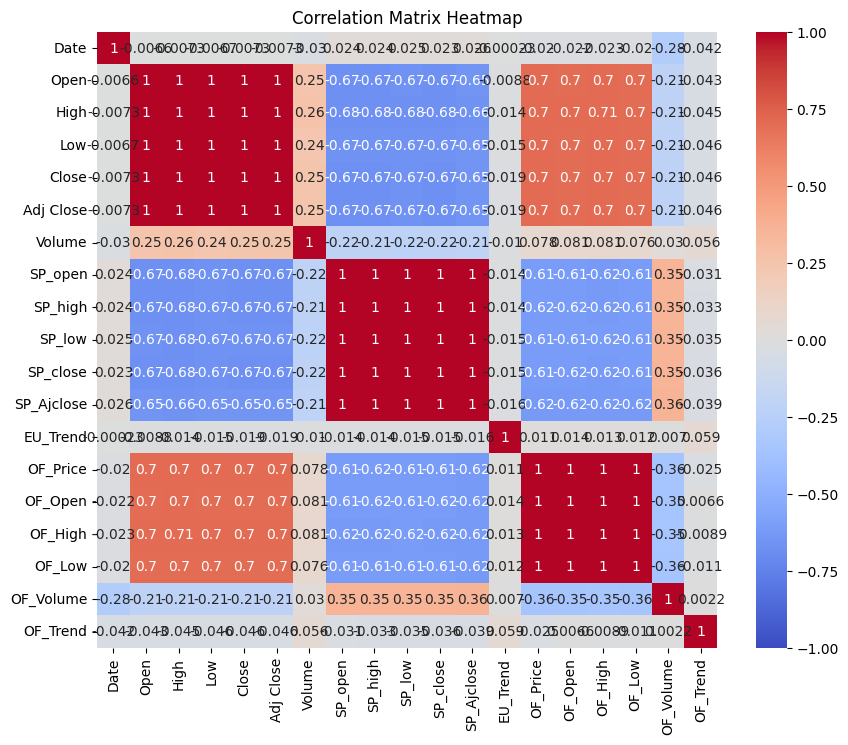

In [106]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [107]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [108]:
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [109]:

print(f"Features to drop due to high correlation: {to_drop}")


Features to drop due to high correlation: ['High', 'Low', 'Close', 'Adj Close', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'OF_Open', 'OF_High', 'OF_Low']


In [110]:
df= df.drop(to_drop, axis=1)

In [116]:
df.columns


Index(['Date', 'Open', 'Volume', 'SP_open', 'EU_Trend', 'OF_Price',
       'OF_Volume', 'OF_Trend'],
      dtype='object')

In [117]:
target='Open'

In [118]:

Y = df[target]
Y

,Open
0,1.606079
1,1.581227
2,1.648848
3,1.726296
4,2.014700
...,...
1692,-0.426620
1693,-0.365933
1694,-0.368823
1695,-0.355530


In [119]:
X= df.loc[:,df.columns != target]

X


,Date,Volume,SP_open,EU_Trend,OF_Price,OF_Volume,OF_Trend
0,842,2.655781,-1.905491,0,1.024993,-2.392920,0
1,899,1.966790,-1.923989,0,0.961284,-0.977134,1
2,1064,0.835823,-1.927920,1,0.971902,-0.889316,0
3,1123,0.144135,-1.925145,0,1.085041,-0.637570,0
4,1297,-0.187261,-1.725827,1,1.205868,-0.545361,1
...,...,...,...,...,...,...,...
1692,1352,0.265827,0.776976,0,-0.974887,-1.696117,1
1693,1453,1.189951,0.705989,1,-0.828429,-1.687335,0
1694,1511,0.699387,0.858599,0,-0.913009,-1.399224,1
1695,1565,-0.316518,1.020689,0,-0.911544,-2.361621,0


In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


In [122]:
from sklearn.model_selection import train_test_split #This line imports the required function. Make sure this is executed in the notebook before the next line of code.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [124]:

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [125]:

Y_pred_linear = linear_model.predict(X_test)

In [126]:

mse_linear = mean_squared_error(Y_test, Y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print(f"Linear Regression - MSE: {mse_linear}, RMSE: {rmse_linear}")

Linear Regression - MSE: 0.3652553460535783, RMSE: 0.6043635876304746


In [131]:
Y = Y.astype(int)

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [133]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:

Y_pred_logistic = logistic_model.predict(X_test)

In [136]:

accuracy = accuracy_score(Y_test, Y_pred_logistic)
print(f"Logistic Regression - Accuracy: {accuracy}")

Logistic Regression - Accuracy: 0.8588235294117647


In [137]:

mse_linear = mean_squared_error(Y_test, Y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print(f"Linear Regression - MSE: {mse_linear}, RMSE: {rmse_linear}")

Linear Regression - MSE: 1.070512142954021, RMSE: 1.034655567304415
